## Overview
Weekend hackathons are fun, aren't they! In our last weekend hackathon, we introduced a new and unique problem statement using UCI open dataset. But, we were big-time disappointed as some of the participants ended up probing the leaderboard. However, we decided to host an open UCI dataset competition again this weekend. So In this weekend hackathon, we have trained a machine learning model to perturb the target column instead of manually adding the noise. Yes, you heard it right, In this hackathon, we are challenging all the MachineHackers to capture our leaderboard's and prove their mettle by competing against MachineHack's AI.<br>
<br>

The dataset was collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the power plant was set to work with a full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.<br>

A combined-cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST), and heat recovery steam generators.<br>

In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has an effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.<br>
<br>


**Dataset Description:**

**Train.csv** - 9568 rows x 5 columns

**Test.csv** - 38272 rows x 4 columns

**Sample_Submission.csv** - Accepted submission format

Attribute Information:

Features consist of hourly average ambient variables

1.  **Temperature (T)** in the range 1.81°C and 37.11°C
2.  **Ambient Pressure (AP)** in the range 992.89-1033.30 millibar
3.  **Relative Humidity (RH)** in the range of 25.56% to 100.16%
4.  **Exhaust Vacuum (V)** in the range 25.36-81.56 cm Hg
5.  Net hourly electrical energy output (PE) 420.26-495.76 MW

*The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.*


## 1. Importing and inital analysis 

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
train = pd.read_csv('C:/Users/Aravind/Desktop/Power Plant Energy Output Prediction  Weekend Hackathon -13/Train.csv')
train.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [24]:
test = pd.read_csv('C:/Users/Aravind/Desktop/Power Plant Energy Output Prediction  Weekend Hackathon -13/Test.csv')
test.head()

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38272 entries, 0 to 38271
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      38272 non-null  float64
 1   V       38272 non-null  float64
 2   AP      38272 non-null  float64
 3   RH      38272 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [27]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [28]:
test.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

**No Missing values in the dataset**

In [29]:
train.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [14]:
test.describe()

,AT,V,AP,RH
count,38272.000000,38272.000000,38272.000000,38272.000000
mean,19.633075,54.266914,1013.244116,73.344928
std,7.463148,12.714068,5.946604,14.594796
min,1.810000,25.360000,992.890000,25.560000
25%,13.500000,41.700000,1009.070000,63.390000
50%,20.300000,52.050000,1012.920000,74.990000
75%,25.710000,66.510000,1017.240000,84.840000
max,37.110000,81.560000,1033.300000,100.160000


## 2. Exploratory Data Analysis

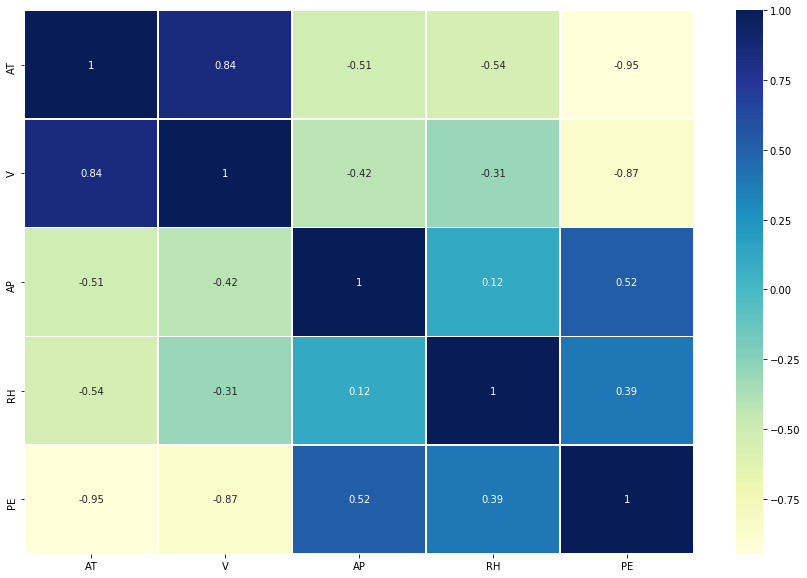

In [30]:
# Correlation Coefficient Matrix => Train Dataset

corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

AP(Ambient Pressure) has more correlated to the output(PE) coming second is the RH(Relative Humidity)

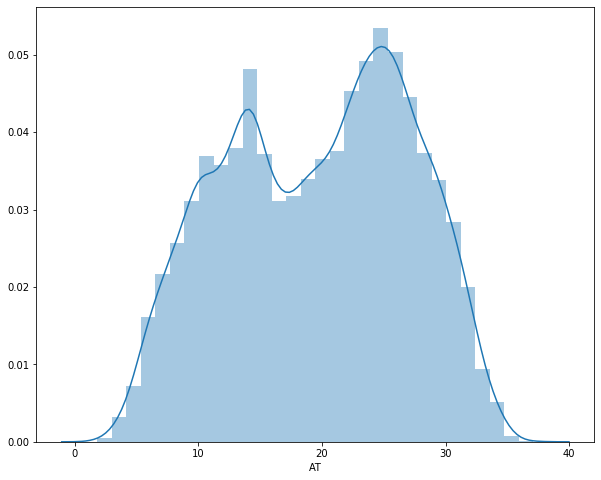

In [16]:
# Distribution plots of Temperature(AT)

plt.figure(figsize = (10,8))
sns.distplot(train['AT'], bins = 30,  kde = True);

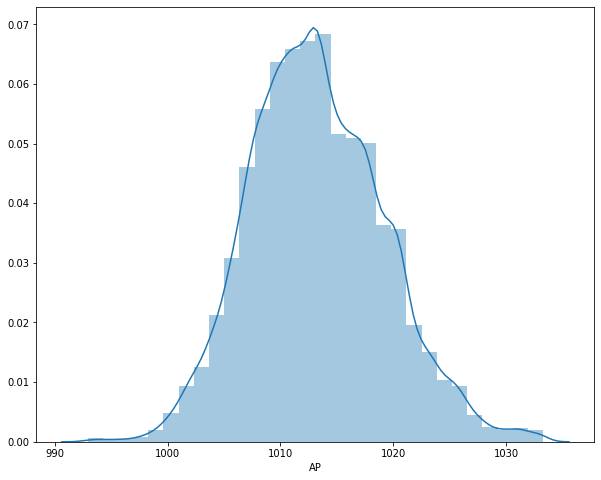

In [17]:
# Distribution plots of Ambient Pressure

plt.figure(figsize = (10,8))
sns.distplot(train['AP'], bins = 30,  kde = True);

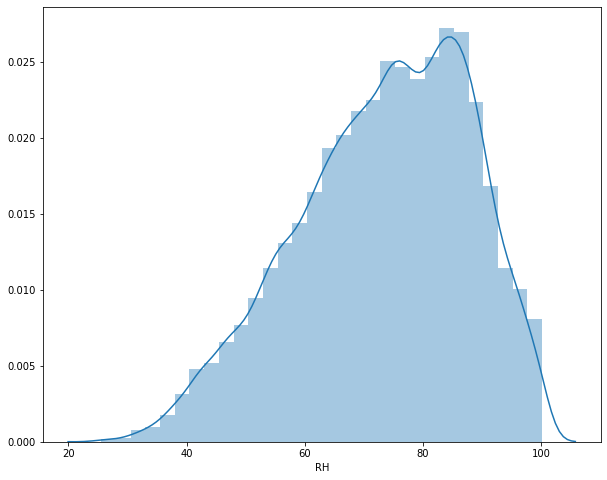

In [18]:
# Distribution plots of Relative Humidity

plt.figure(figsize = (10,8))
sns.distplot(train['RH'], bins = 30,  kde = True);

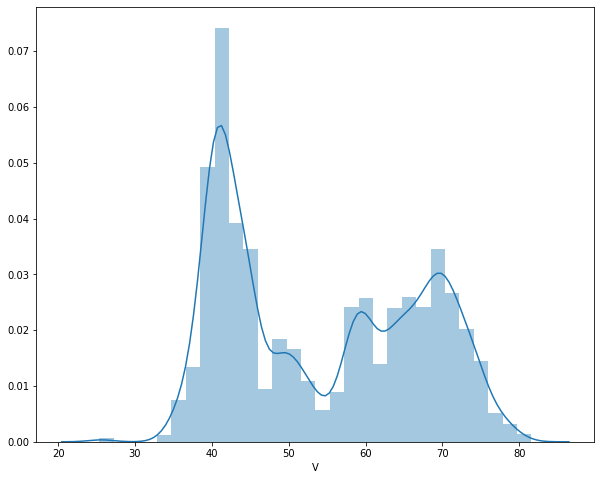

In [19]:
# Distribution plots of Exhaust Vacuum

plt.figure(figsize = (10,8))
sns.distplot(train['V'], bins = 30,  kde = True);

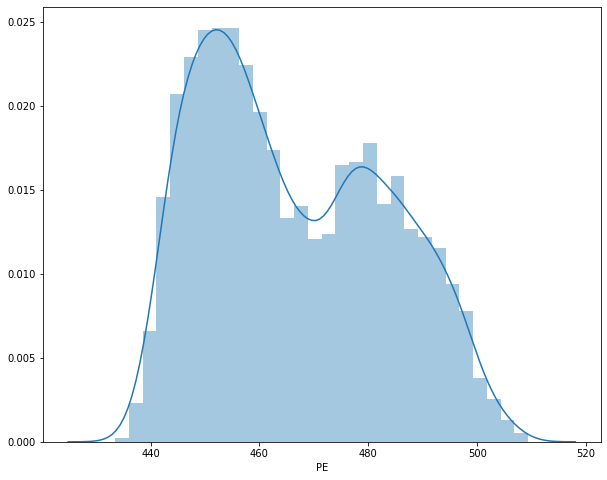

In [31]:
# Distribution plots of Output Feature

plt.figure(figsize = (10,8))
sns.distplot(train['PE'], bins = 30,  kde = True);

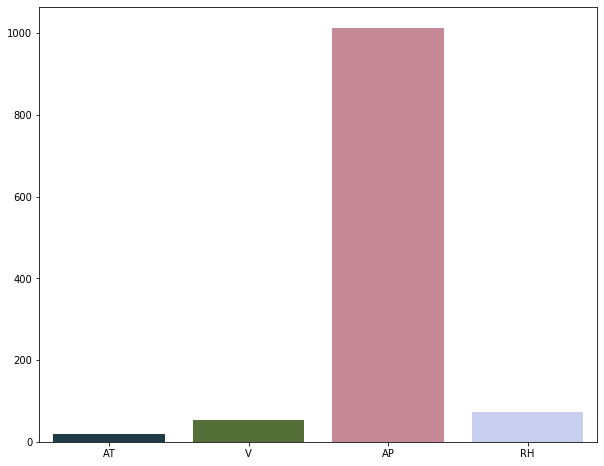

In [22]:
plt.figure(figsize = (10,8))
sns.barplot(palette = 'cubehelix', data = train);

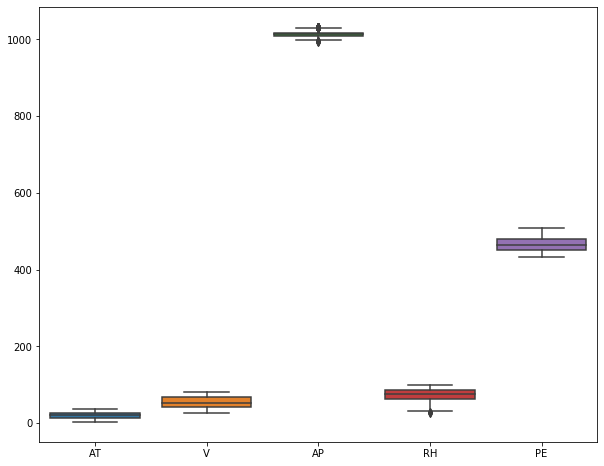

In [32]:
plt.figure(figsize = (10,8))
sns.boxplot(data = train);

In [21]:
# !apt-get install swig -y
# !pip install Cython numpy
# !pip install auto-sklearn

Active code page: 1252


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Active code page: 1252
Active code page: 1252
  Using cached auto-sklearn-0.8.0.tar.gz (4.6 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Aravind\anaconda3-NEW\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Aravind\\AppData\\Local\\Temp\\pip-install-b4uua06z\\auto-sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\Aravind\\AppData\\Local\\Temp\\pip-install-b4uua06z\\auto-sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Aravind\AppData\Local\Temp\pip-install-b4uua06z\auto-sklearn\pip-egg-info'
         cwd: C:\Users\Aravind\AppData\Local\Temp\pip-install-b4uua06z\auto-sklearn\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Aravind\AppData\Local\Temp\pip-install-b4uua06z\auto-sklearn\setup.py", line 13, in <module>
        sys.platform
    ValueError: Detected unsupported

In [24]:
# import sklearn
# import autosklearn.regression as regressor

In [33]:
# Splitting training dataset into train and test
X = train.copy().drop(['PE'], axis=1).values
y = train['PE']

In [34]:
test = test.copy().values

In [35]:
print(train.shape)
print(X.shape)
print(y.shape)

(9568, 5)
(9568, 4)
(9568,)


In [36]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [37]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_whole = sc.transform(X.copy())
test_v = sc.transform(test)

In [32]:
# automlregressor = regressor.AutoSklearnRegressor(time_left_for_this_task = 180, per_run_time_limit = 40)
# automlregressor.fit(X_train, y_train)

[WARNING] [2020-07-26 15:24:57,915:AutoMLSMBO(1)::69ce51e68ee8667afa04086974e75ae6] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=True,
                     delete_tmp_folder_after_terminate=True,
                     disable_evaluator_output=False, ensemble_memory_limit=1024,
                     ensemble_nbest=50, ensemble_size=50,
                     exclude_estimators=None, exclude_preprocessors=None,
                     get_smac_object_callback=None, include_estimators=None,
                     include_preprocessors=None,
                     initial_configurations_via_metalearning=25,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=3072,
                     n_jobs=None, output_folder=None, per_run_time_limit=40,
                     resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=180, tmp_folder=None)

## 1. Linear Regression 

In [73]:
# import xgboost as xgb

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
reg = RandomForestRegressor()
reg_fit = reg.fit(X_train, y_train)

In [133]:
lr_pred_test = reg_fit.predict(X_test)
lr_pred_train = reg_fit.predict(X_train)

In [134]:
print(metrics.mean_squared_error(y_test, lr_pred_test))#test accuracy
print(metrics.mean_squared_error(y_train, lr_pred_train))#train accuracy

9.314163135809054
1.2991124035418469


In [135]:
lr_rmse_test = sqrt(mean_squared_error(y_test, lr_pred_test))
lr_rmse_train = sqrt(mean_squared_error(y_train, lr_pred_train))

In [136]:
print(lr_rmse_test)
print(lr_rmse_train)

3.0519113905565893
1.1397861218412193


In [137]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [140]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [138]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [142]:
forest_two = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [143]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.1s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.7s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  15.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=  12.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  12.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  19.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  20.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  21.6s
[CV] n_estimators=822, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  41.7s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  34.1s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  25.3s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  19.1s
[CV] n_estimators=733, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=733,

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  15.4s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  12.1s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  11.0s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   9.8s
[CV] n_estimators=466, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=466, mi

[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  10.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  24.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  28.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=  30.7s
[CV] n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=288, min

[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total= 1.6min
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  56.3s
[CV] n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=911, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=  44.4s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=  31.7s
[CV] n_estimators=733, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=733, min_sampl

[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  15.5s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  17.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  51.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=  56.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   7.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  44.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  47.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=  39.2s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=377

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  26.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  30.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=  35.3s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=  13.3s
[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimato

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 110.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [144]:
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [145]:
rf_random.best_score_

0.9699031636612373

In [148]:
reg = RandomForestRegressor(n_estimators=733, min_samples_split=5, min_samples_leaf=1,
                            max_features='sqrt', max_depth=80, bootstrap=False)
reg_fit = reg.fit(X_train, y_train)

In [149]:
lr_pred_test = reg_fit.predict(X_test)
lr_pred_train = reg_fit.predict(X_train)

In [150]:
print(metrics.mean_squared_error(y_test, lr_pred_test))#test accuracy
print(metrics.mean_squared_error(y_train, lr_pred_train))#train accuracy

8.228932276839412
0.47167367842082764


In [151]:
lr_rmse_test = sqrt(mean_squared_error(y_test, lr_pred_test))
lr_rmse_train = sqrt(mean_squared_error(y_train, lr_pred_train))

In [152]:
print(lr_rmse_test)
print(lr_rmse_train)

2.868611559071638
0.6867850307198226


In [153]:
test_pred = reg_fit.predict(test_v)

In [154]:
print(test_pred.shape)
test_pred[:10]

(38272,)


array([473.28392117, 494.91322993, 496.70390643, 480.12529632,
       446.0991943 , 456.76877292, 457.67787905, 462.8166849 ,
       475.90087658, 474.25256399])

In [155]:
# save results to csv
subm = pd.DataFrame({'PE': test_pred})
subm = subm[['PE']]

In [156]:
filename='C:/Users/Aravind/Desktop/Power Plant Energy Output Prediction  Weekend Hackathon -13/Power_final4.csv'

In [157]:
subm.to_csv(filename,index=False)